# Projet Machine Learning - Groupe 1 - Notebook R

Promotion 58 - 4GMM, Année universitaire 2023-2024\
Julia Manon (B), Piot Damien (A), Dumas Thomas (B), Ben Abdallah Selim (A)

Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à
la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.

---

Les variables sont les suivantes:\
• **Entity** : Nom du pays ou de la région pour lequel les données sont rapportées.\
• **Year** : Année pour laquelle les données sont communiquées, entre 2000 et 2020.\
• **Access to electricity (% of population)** : Pourcentage de la population ayant accès à l’électricité.\
• **Access to clean fuels for cooking (% of population)** : Pourcentage de la population qui utilise principalement des combustibles propres.\
• **Renewable-electricity-generating-capacity-per-capita** : Capacité installée d’énergie renouvelable par personne.\
• **Financial flows to developing countries (US Dollars)** : Aide et assistance des pays développés pour les projets d’énergie propre.\
• **Renewable energy share in total final energy consumption (%)** : Pourcentage d’énergie renouve- lable dans la consommation d’énergie finale.\
• **Electricity from fossil fuels (TWh)** : Électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures.\
• **Electricity from nuclear (TWh)** : Électricité produite à partir de l’énergie nucléaire en térawattheures.\
• **Electricity from renewables (TWh)** : Électricité produite à partir de sources renouvelables (hydroélec-
tricité, énergie solaire, énergie éolienne, etc.) en térawattheures.\
• **Low-carbon electricity (% electricity)** : Pourcentage d’électricité provenant de sources à faible teneur en carbone (nucléaire et énergies renouvelables).\
• **Primary energy consumption per capita (kWh/person)** : Consommation d’énergie par personne en kilowattheures.
• **Energy intensity level of primary energy (MJ/2011 PPP GDP)** : Consommation d’énergie par unité de PIB à parité de pouvoir d’achat.\
• **Value-co2-emissions (metric tons per capita)** : Émissions de dioxyde de carbone par personne en tonnes métriques.\
• **Renewables (% equivalent primary energy)** : Équivalent énergie primaire provenant de sources re- nouvelables.\
• **GDP growth (annual %)** : Taux de croissance annuel du PIB en monnaie locale constante.\
• **GDP per capita** : Produit intérieur brut (PIB) par personne.\
• **Density (P/Km2)** : Densité de population en personnes par kilomètre carré.\
• **Land Area (Km2)** : Surface terrestre totale en kilomètres carrés.\
• **Latitude** : Latitude du centroïde du pays en degrés décimaux.\
• **Longitude** : Longitude du centroïde du pays en degrés décimaux.

---

**Objectif** : Notre objectif est de prédire la variable **Value-co2-emissions** à partir des autres variables.

---

# 1 - Prise en main des données 

In [3]:
# file_path <- "ProjetML/global-data-on-sustainable-energy .csv"
file_path <- "global-data-on-sustainable-energy .csv"
data <- read.csv(file_path)

head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


In [6]:
summary(data)

    Entity               Year       Elec_access       Clean_access   
 Length:3649        Min.   :2000   Min.   :  1.252   Min.   :  0.00  
 Class :character   1st Qu.:2005   1st Qu.: 59.801   1st Qu.: 23.18  
 Mode  :character   Median :2010   Median : 98.362   Median : 83.15  
                    Mean   :2010   Mean   : 78.934   Mean   : 63.26  
                    3rd Qu.:2015   3rd Qu.:100.000   3rd Qu.:100.00  
                    Max.   :2020   Max.   :100.000   Max.   :100.00  
                                   NA's   :10        NA's   :169     
 Renewable_per_capita Financial_flows     Renewable_share   Fossil_elec     
 Min.   :   0.00      Min.   :0.000e+00   Min.   : 0.000   Min.   :   0.00  
 1st Qu.:   3.54      1st Qu.:2.600e+05   1st Qu.: 6.515   1st Qu.:   0.29  
 Median :  32.91      Median :5.665e+06   Median :23.300   Median :   2.97  
 Mean   : 113.14      Mean   :9.422e+07   Mean   :32.638   Mean   :  70.36  
 3rd Qu.: 112.21      3rd Qu.:5.535e+07   3rd Qu.:55.24

Interprétation :

Les noms des colonnes sont assez compliqués, ils sont longs et contiennent des espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. De plus, en observant un apperçu de notre dataframe, nous constatons que certaines données sont manquantes. Cela est visible par les valeurs marquées comme NaN. Pour palier cela, nous pouvons réaliser 2 traitements possibles : supprimer les données manquantes ou les estimer. Nous traiterons ces deux possibilités ultérieurement.

Nous commençons par renommer nos colonnes pour simplifier notre dataframe.

## 1.1 - Vérification de la nature des variables et de leur encodage

Nous allons convertir la variable 'Year' en variable qualitative. En effet, nous souhaitons que les années de nos données soient assimilées à des modalités ou catégories. C'est pour cela que la nature qualitative est à privilégier. De plus, on observe que la densité est présentée comme une variable qualitative alors que les données de cette colonne sont numériques et expriment une quantité. Nous allons modifier la nature de la variable 'Density' pour la convertir en variable quantitative.

In [28]:
data$Entity = as.factor(data$Entity) #On convertir Entity en variable qualitative
data$Year = as.factor(data$Year) #On convertit Year en variable qualitative
data$Density.n.P.Km2. = as.numeric(gsub(",","",data$Density.n.P.Km2.)) 
#On convertit Density(P/Km2) en une variable numérique

head(data)
#summary(data)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Density.n.P.Km2., value = numeric(0)): le tableau de remplacement a 0 lignes, le tableau remplacé en a 2868


Comme pour le notebook python, nous allons renommer les colonnes, selon la même nomenclature.

In [4]:
print(colnames(data))

 [1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.electricity.generating.capacity.per.capita"            
 [6] "Financial.flows.to.developing.countries..US..."                  
 [7] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [8] "Electricity.from.fossil.fuels..TWh."                             
 [9] "Electricity.from.nuclear..TWh."                                  
[10] "Electricity.from.renewables..TWh."                               
[11] "Low.carbon.electricity....electricity."                          
[12] "Primary.energy.consumption.per.capita..kWh.person."              
[13] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[14] "Value_co2_emissions_kt_by_country"                        

In [5]:
#names(data)[] <- ""
names(data)[3] <- "Elec_access"
names(data)[4] <- "Clean_access"
names(data)[5] <- "Renewable_per_capita" #
names(data)[6] <- "Financial_flows" #
names(data)[7] <- "Renewable_share"
names(data)[8] <- "Fossil_elec"
names(data)[9] <- "Nuclear_elec"
names(data)[10] <- "Renewable_elec"
names(data)[11] <- "Low_carb_elec"
names(data)[12] <- "Energy_per_capita"
names(data)[13] <- "PEnergy_intensity"
names(data)[14] <- "CO2"
names(data)[15] <- "Renewables" #
names(data)[16] <- "Growth"
names(data)[17] <- "GDP_per_capita"
names(data)[18] <- "Density"
names(data)[19] <- "Area"
      
#print(colnames(data))
head(data)

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,⋯,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


## 1.2 - Déterminons le taux de valeurs manquantes pour chaque variable

Dans la partie d'ouverture du jeu de données, nous avons pu constater que certaines valeurs étaient manquantes. Nous allons donc étudier le taux de valeurs manquantes pour chaque variable.

In [7]:
missing_rates <- sapply(data, function(x) mean(is.na(x)))
missing <-  missing_rates * 100
print(missing)

              Entity                 Year          Elec_access 
          0.00000000           0.00000000           0.27404768 
        Clean_access Renewable_per_capita      Financial_flows 
          4.63140586          25.51383941          57.24856125 
     Renewable_share          Fossil_elec         Nuclear_elec 
          5.31652508           0.57550014           3.45300082 
      Renewable_elec        Low_carb_elec    Energy_per_capita 
          0.57550014           1.15100027           0.00000000 
   PEnergy_intensity                  CO2           Renewables 
          5.67278706          11.72924089          58.56399013 
              Growth       GDP_per_capita              Density 
          8.68731159           7.72814470           0.00000000 
                Area             Latitude            Longitude 
          0.02740477           0.02740477           0.02740477 


On observe que les variables **Renewable-electricity-generating-capacity-per-capita** que l'on a renommé **Renawable_per_capita**,**Financial flows to developing countries (US Dollars)** que l'on a renommé **Financial_flows** et **Renewables (% equivalent primary energy)** que l'on a renommé **Renewables** ont plus de 25% (et même plus de 57% pour **Financial_flows** et **Energy_per_capita**) de valeurs manquantes. Nous allons donc les supprimer.

In [8]:
# Supression des colonnes ayant un taux de données manquantes trop élevé
data$Financial_flows <- NULL
data$Renewables <- NULL
data$Renewable_per_capita <- NULL

#head(data)
colnames(data) #Nous constatons que les variables concernées ont bien été supprimées

[1] "Entity"            "Year"              "Elec_access"      
 [4] "Clean_access"      "Renewable_share"   "Fossil_elec"      
 [7] "Nuclear_elec"      "Renewable_elec"    "Low_carb_elec"    
[10] "Energy_per_capita" "PEnergy_intensity" "CO2"              
[13] "Growth"            "GDP_per_capita"    "Density"          
[16] "Area"              "Latitude"          "Longitude"

Interprétation :

La nouvelle taille du dataframe nous confirme que nos colonnes ont bien été supprimées.

Pour la suite de l'étude, nous souhaitons travailler sur un jeu de données ne comprenant pas de valeurs manquantes. Pour ce faire, nous allons supprimer les lignes contenant des valeurs manquantes.

## 1.3 - On ne garde que les individus qui n'ont pas de valeurs manquantes

In [9]:
nb_ind <- nrow(data)
print(paste("Nombre d'individus actuel : ", nb_ind)) #3649 individus
head(data)
write.csv(data, file = "test_dataframe.csv", row.names = FALSE)

[1] "Nombre d'individus actuel :  3649"


,Entity,Year,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,44.99,0.16,0,0.31,65.95744,302.5948,1.64,760,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,45.60,0.09,0,0.50,84.74577,236.8919,1.74,730,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,37.83,0.13,0,0.56,81.15942,210.8622,1.40,1030,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,36.66,0.31,0,0.63,67.02128,229.9682,1.40,1220,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,44.24,0.33,0,0.56,62.92135,204.2312,1.20,1030,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,33.88,0.34,0,0.59,63.44086,252.0691,1.41,1550,11.229715,242.0313,60,652230,33.93911,67.70995


In [11]:
#Supression des individus pourlesquels on a des valeurs manquantes
data <- na.omit(data) #je trouve 2082 au lieu de 2868, ça supprime trop de lignes 
# En ré-exécutant j'ai bien trouvé 2868 (Manon)
new_nb_ind <- nrow(data)
print(paste("Nombre d'individus après supression des valeurs manquantes : ", new_nb_ind))

[1] "Nombre d'individus après supression des valeurs manquantes :  2868"


Interprétation :

Notre jeu de données contient 2868 observations définies par 18 caractéristiques. Le nombre d'observations est en adéquation avec les données du sujet.

# 2 - Analyse exploratoire des données

## 2.1 - Analyse descriptive unidimensionnelle des données

On s'intéresse dans un premier temps aux variables quantitatives. Nous allons toutes les représenter sous formz d'histogramme pour visualiser leur distribution.

In [13]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(readr)
library(viridis)
library(dplyr)


Attachement du package : ‘dplyr’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”
Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”


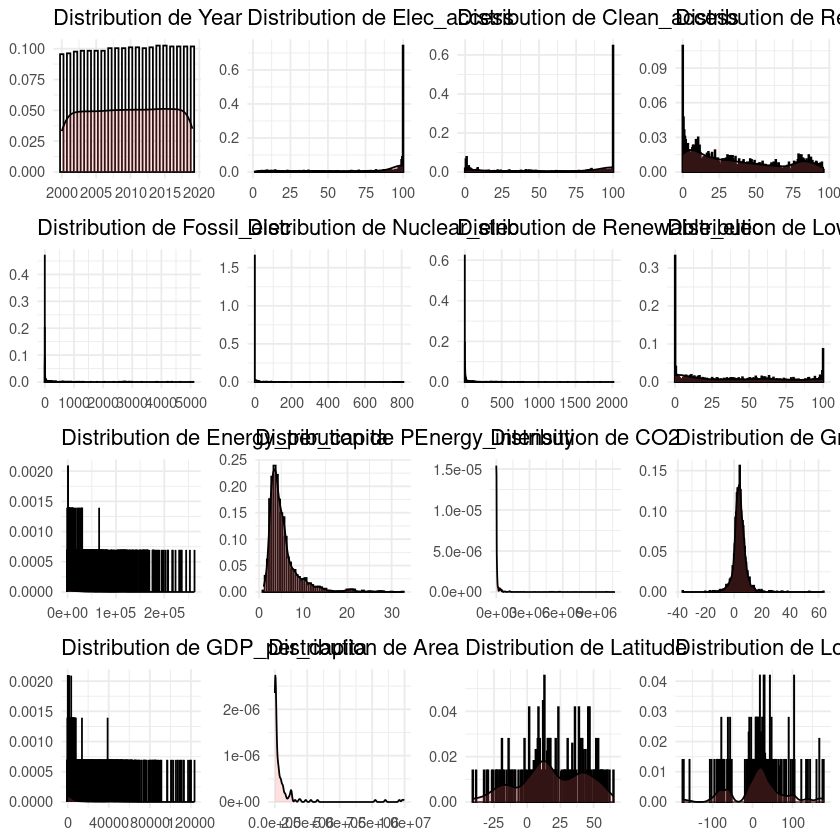

In [15]:
# Sélectionner les colonnes numériques pour la visualisation
numeric_columns <- sapply(data, is.numeric)
data_numeric <- data[, numeric_columns]

# Définir le nombre de colonnes et de lignes pour les subplots
n_cols <- 4
num_plots <- length(data_numeric)
n_rows <- ceiling(num_plots / n_cols) # Arrondir à l'entier supérieur pour s'assurer d'avoir assez de lignes

# Initialiser une liste pour stocker les plots
plots <- list()

# Créer un plot pour chaque variable quantitative
for (i in 1:num_plots) {
  column <- names(data_numeric)[i]
  p <- ggplot(data, aes_string(x=column)) +
    geom_histogram(aes(y=..density..), binwidth=0.5, colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666") +
    labs(title=paste("Distribution de", column), x=NULL, y=NULL) +
    theme_minimal()
  plots[[i]] <- p
}

# Ajuster l'espacement entre les subplots pour une meilleure lisibilité et afficher les plots
do.call("grid.arrange", c(plots, ncol = n_cols))

Interprétation :

* Accès à l'électricité et à des combustibles propres : Ces variables montrent une distribution bimodale ou multimodale, indiquant des différences significatives dans l'accès à ces ressources entre différents pays sur différentes années. Des pics vers les valeurs élevées suggèrent que de nombreux pays ont réussi à fournir un accès presque universel, tandis que des creux sont visibles et symbolisent un accès limité.

* Part d'énergie renouvelable dans la consommation d'énergie : On observe que certaines valeurs sont concentrées vers le bas de l'échelle, indiquant des pays où l'énergie renouvelable. Elles constituent une petite partie de la consommation d'énergie. D'autres valeurs étalées vers des pourcentages plus élevés reflètent le fait que certains pays réalisent des efforts pour intégrer les énergies renouvelables.

* Consommation d'énergie primaire par habitant : Cette variable suit une distribution asymétrique avec une longue queue à droite, suggérant que la majorité des pays ont une consommation d'énergie par habitant assez faible, tandis qu'une minorité de pays (probablement des pays plus développés avec de plus grandes industries) ont des valeurs significativement plus élevées.

* Intensité énergétique et émissions de CO2 : Ces variables montrent des distributions asymétriques, montrant des variations dans l'efficacité énergétique et les différences de niveaux d'émissions entre les pays. Les pays avec une intensité énergétique élevée ou des émissions de CO2 élevées peuvent indiquer une dépendance plus importante aux combustibles fossiles ou une efficacité énergétique moindre.

* Croissance du PIB et PIB par habitant : Ces distributions peuvent fournir des informations sur le développement économique et la répartition de la richesse entre les pays. Des asymétries dans ces distributions pourraient signifier que certains pays profitent d'une croissance économique significative et de niveaux de vie élevés, alors que d'autres restent dans des conditions de faible croissance.

Ces observations peuvent nous aider à identifier des tendances, des anomalies, ou des domaines nécessitant une étude plus approfondie. La manière dont ces variables se distribuent peut également suggérer des stratégies pour gérer les valeurs manquantes, transformer les données, ou choisir des modèles de machine learning adaptés à la nature de nos données.

Cepandant, certains graphiques ne sont pas très visibles avec cet affichage sous forme de subplots, nous allons zoomer sur certains histogrammes

Warning message:
“Removed 144 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 144 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 144 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 144 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


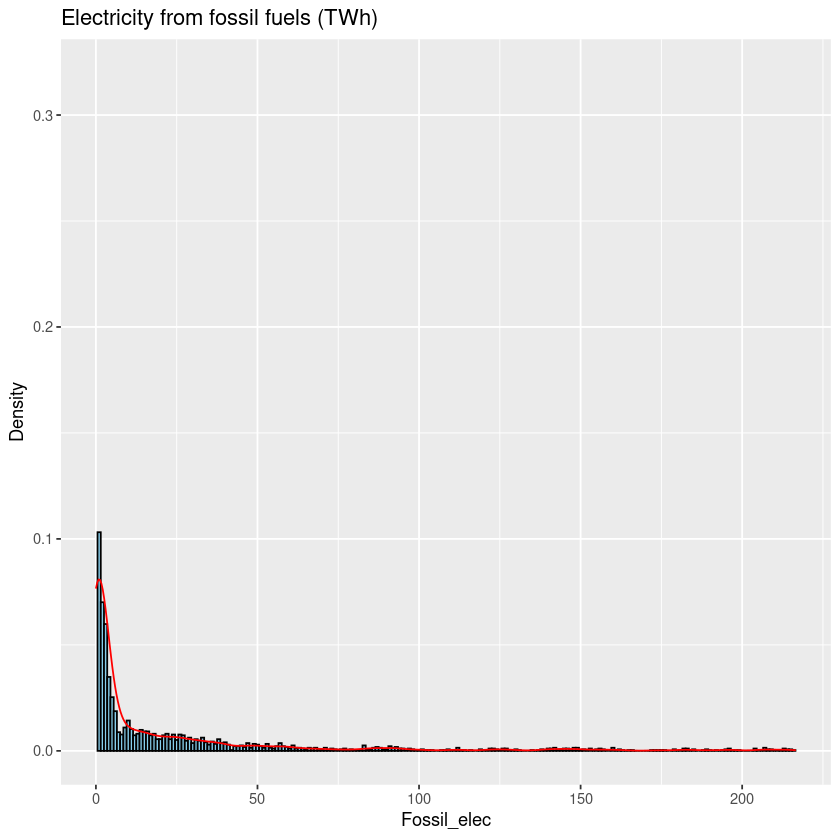

Warning message:
“Removed 144 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 144 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


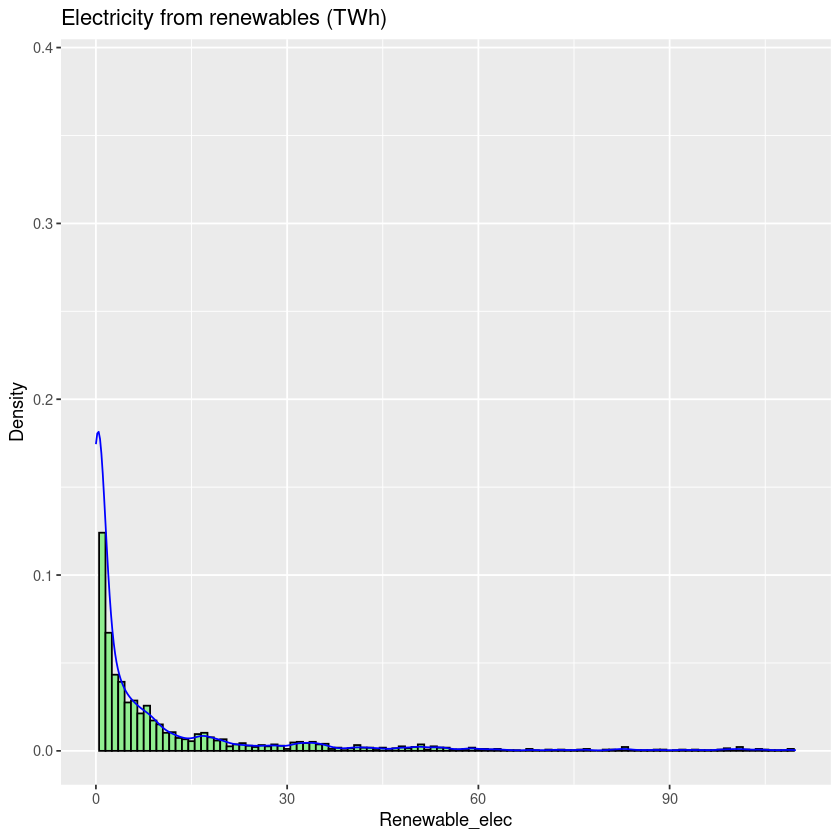

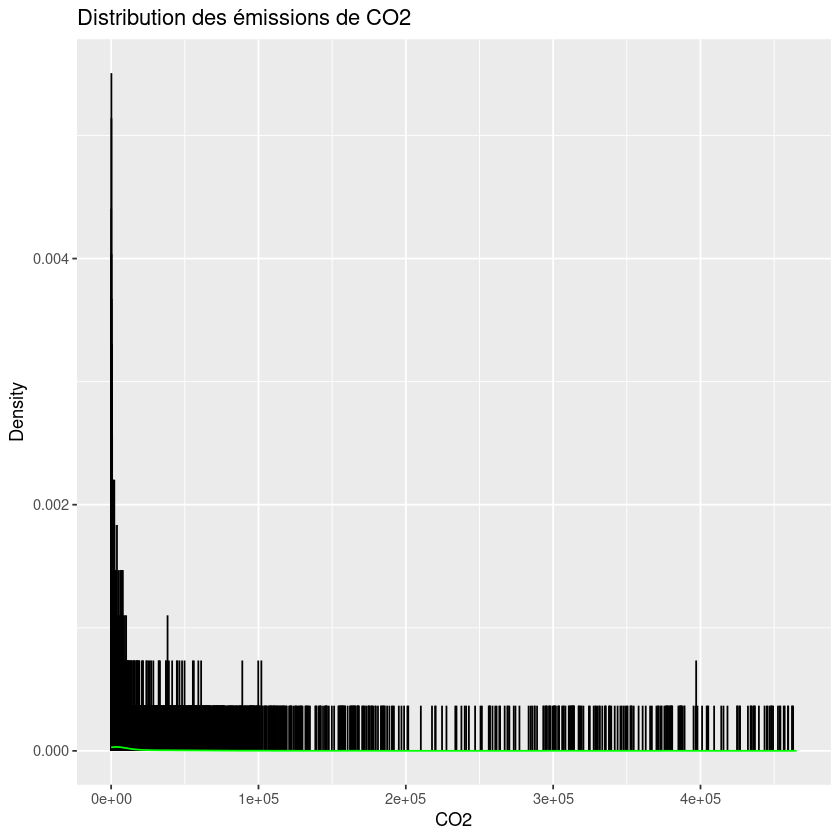

In [17]:
# Ajustement de la taille du graphique pour 'Fossil_elec'
g1 <- ggplot(data, aes(x=Fossil_elec)) +
  geom_histogram(aes(y=..density..), binwidth=1, fill="skyblue", color="black") +
  geom_density(color="red") +
  labs(title='Electricity from fossil fuels (TWh)', x='Fossil_elec', y='Density') +
  xlim(min(data$Fossil_elec, na.rm = TRUE), quantile(data$Fossil_elec, 0.95, na.rm = TRUE))

# Afficher le graphique pour 'Fossil_elec'
print(g1)

# Ajustement de la taille du graphique pour 'Renewable_elec'
g2 <- ggplot(data, aes(x=Renewable_elec)) +
  geom_histogram(aes(y=..density..), binwidth=1, fill="lightgreen", color="black") +
  geom_density(color="blue") +
  labs(title='Electricity from renewables (TWh)', x='Renewable_elec', y='Density') +
  xlim(min(data$Renewable_elec, na.rm = TRUE), quantile(data$Renewable_elec, 0.95, na.rm = TRUE))

# Afficher le graphique pour 'Renewable_elec'
print(g2)

# Ajustement de la taille du graphique pour 'CO2'
g3 <- ggplot(data, aes(x=CO2)) +
  geom_histogram(aes(y=..density..), binwidth=1, fill="grey", color="black") +
  geom_density(color="green") +
  labs(title='Distribution des émissions de CO2', x='CO2', y='Density') +
  xlim(min(data$CO2, na.rm = TRUE), quantile(data$CO2, 0.95, na.rm = TRUE))

# Afficher le graphique pour 'CO2'
print(g3)

Interprétation :

* Électricité provenant des combustibles fossiles : Ce graphique montre la distribution des valeurs de production d'électricité à partir de combustibles fossiles à travers différents pays ou années. Cette distribution se concentrant sur la majorité des données, on observe que la production est généralement faible pour la plupart des observations, avec quelques exceptions plus élevées.

* Électricité provenant des énergies renouvelables : Cette distribution met en évidence la variabilité de la production d'électricité à partir de sources renouvelables. Comme pour l'électricité fossile, la plupart des valeurs sont relativement basses, reflétant probablement les efforts de transition énergétique en cours dans de nombreux pays.

* Emissions de CO2 : On observe que la plupart des pays ont des niveaux d'émissions relativement bas, avec une longue tendance plate à droite indiquant que quelques pays émettent des quantités significativement plus élevées de CO2. Cette distribution est asymétrique.

## 2.2 - Transformation des variables

Avec les observations réalisées dans la partie précédente, nous pouvons nous demander s'il serait judicieux de transformer nos données. Nous pouvons nous demader ce que nous pourrions modifier sur celles-ci et ce que ces modifications pourraient apporter.

* Réduction de l'asymétrie : Certaines de nos variables montrent une distribution asymétrique avec une queue à droite, ce qui indique une asymétrie positive. Une transformation logarithmique pourrait aider à réduire cette asymétrie, rendant la distribution plus proche d'une distribution normale. Cela est souvent une exigence ou une attente pour de nombreux modèles de régression et d'autres analyses statistiques.

* Gestion des valeurs extrêmes : Les valeurs extrêmes observées dans ces variables peuvent influencer de manière très importante les analyses statistiques et les modèles de prédiction. Les transformations peuvent réduire l'impact de ces valeurs extrêmes en les rapprochant du reste des données, améliorant ainsi la robustesse des modèles.

* Stabilisation de la variance : La variance des données peut augmenter avec l'augmentation des valeurs de la variable. Une transformation logarithmique peut aider à stabiliser la variance sur l'ensemble des données.

En résumé, pour notre projet, envisager des transformations pour ces variables quantitatives peut non seulement améliorer la qualité de nos analyses statistiques et de modélisation mais aussi aider à dériver des insights plus précis et fiables à partir de nos données. En particulier, une transformation logarithmique pourrait être une bonne piste d'amélioration.

Nous allons appliquer cette transformation logarithmique sur les colonnes suivantes : 'Fossil_elec', 'Renewable_elec', 'Energy_per_capita' et 'CO2'.

Warning message:
“Computation failed in `stat_bin()`
Caused by error in `bin_breaks_width()`:
! The number of histogram bins must be less than 1,000,000.
ℹ Did you make `binwidth` too small?”


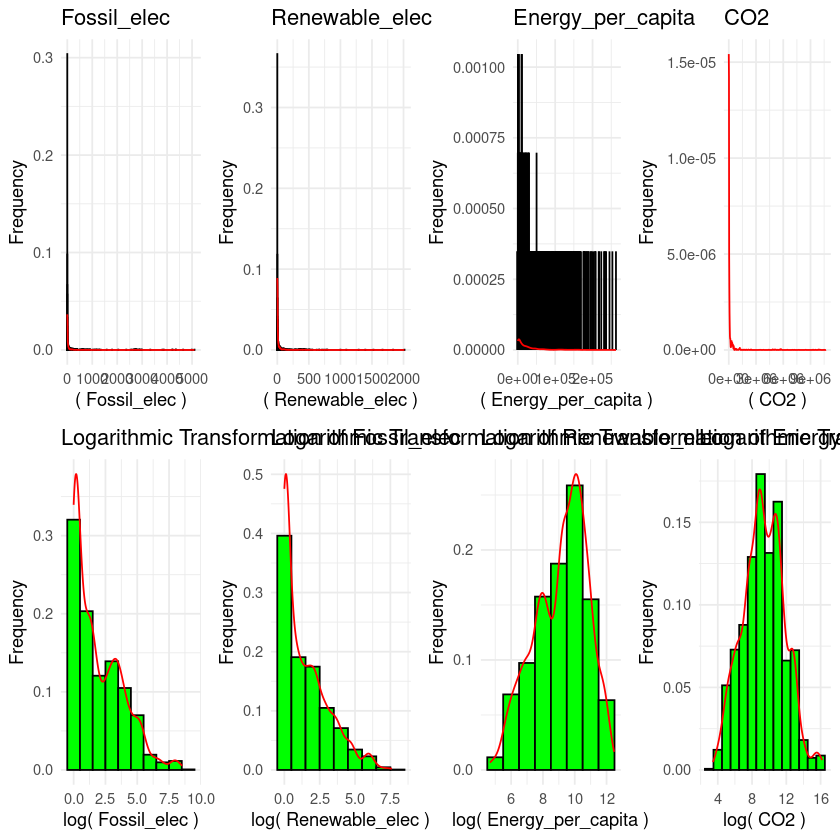

In [19]:
# Liste des colonnes à transformer
columns_to_transform <- c('Fossil_elec', 'Renewable_elec', 'Energy_per_capita', 'CO2')

# Appliquer la transformation logarithmique avec ajustement pour les valeurs nulles
data_transformed <- data %>%
  mutate(across(all_of(columns_to_transform), ~log(.x + 1), .names = "log_{.col}"))

# Préparer la grille de graphiques
plot_list <- list()

# Visualiser les distributions avant transformation
for (i in seq_along(columns_to_transform)) {
  col <- columns_to_transform[i]
  p1 <- ggplot(data, aes_string(x=col)) +
    geom_histogram(aes(y=..density..), binwidth=1, fill="blue", color="black") +
    geom_density(color="red") +
    labs(title=col, x=paste("(", col, ")"), y="Frequency") +
    theme_minimal()
  plot_list[[i]] <- p1
}

# Visualiser les distributions après transformation
for (i in seq_along(columns_to_transform)) {
  col <- paste0("log_", columns_to_transform[i])
  p2 <- ggplot(data_transformed, aes_string(x=col)) +
    geom_histogram(aes(y=..density..), binwidth=1, fill="green", color="black") +
    geom_density(color="red") +
    labs(title=paste("Logarithmic Transformation of", columns_to_transform[i]), x=paste("log(", columns_to_transform[i], ")"), y="Frequency") +
    theme_minimal()
  plot_list[[4+i]] <- p2
}

# Afficher les graphiques
do.call(gridExtra::grid.arrange, c(plot_list, ncol = 4))


Interprétation : Après les transformations logarithmiques on remarque que :

* La distribution de l'électricité provenant des combustibles fossiles, de l'électricité provenant des énergies renouvelables (TWh), de la consommation d'énergie primaire par habitant, et des émissions de CO2 est devenue plus symétrique et ressemble davantage à une distribution normale. On observe un résultat cohérent avec nos attentes.

* La transformation logarithmique a aidé à réduire l'effet des valeurs extrêmes, rendant les distributions moins asymétriques et facilitant potentiellement l'application de techniques statistiques et de modélisation qui supposent la normalité des données.

* Ces transformations peuvent améliorer la performance des modèles en rendant les relations entre les variables plus linéaires et en stabilisant la variance des erreurs.

## 2.3 - Etude des émissions de CO2

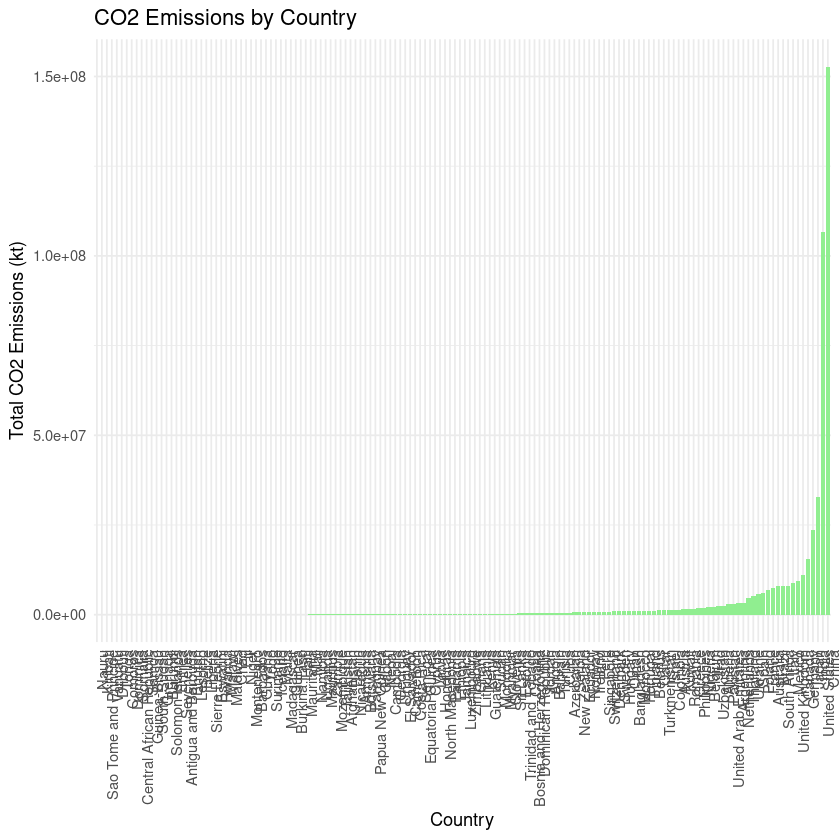

In [21]:
# Calculer les émissions de CO2 par pays
co2_emissions_by_country <- data %>%
  group_by(Entity) %>%
  summarise(Total_CO2 = sum(CO2, na.rm = TRUE)) %>%
  arrange(desc(Total_CO2))

# Visualiser les émissions de CO2 par pays
ggplot(co2_emissions_by_country, aes(x = reorder(Entity, Total_CO2), y = Total_CO2)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "CO2 Emissions by Country",
       x = "Country",
       y = "Total CO2 Emissions (kt)")


Interprétation : 

Le graphique illustre clairement l'hétérogénéité des émissions de CO2 parmi les pays de notre jeu de données. On note une concentration très élevée des émissions parmi les premiers pays et une diminution significative à mesure que l'on avance vers les pays moins émetteurs. Cette distribution montre que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2, tandis que de nombreux autres pays contribuent relativement peu à ce total.

Aussi, on constante que certains pays ont une valeur d'émissions en CO2 nulle, pour pouvoir effectuer des calculs de ratio et autre, on distinguera pour la suite les 176 pays de notre jeu de données, parmis lesquels on compte 148 pays aux émissions non nulles.

In [22]:
# Filtrer les pays avec des émissions de CO2 supérieures à 0
co2_emissions_filtered <- co2_emissions_by_country %>%
  filter(Total_CO2 > 0)

# Trouver les émissions max et min parmi les pays restants
max_emissions <- max(co2_emissions_filtered$Total_CO2)
min_emissions <- min(co2_emissions_filtered$Total_CO2)

# Calculer le ratio
emissions_ratio <- max_emissions / min_emissions

print(paste("Ratio entre le pays le plus émetteur et le pays le moins émetteur :", emissions_ratio))


[1] "Ratio entre le pays le plus émetteur et le pays le moins émetteur : 288175.190683644"


Interprétation :

Le ratio des émissions totales de CO2 entre le pays le plus émetteur (Chine) et le pays le moins émetteur (Kyrgyzstan) est d'environ 288 175, mettant en évidence une différence extrême dans les contributions aux émissions globales de CO2. Cela souligne la concentration très élevée des émissions parmi un petit nombre de pays.

Nous rappelons que pour ce calcul, nous avons sélectionné le pays avec la plus petite valeur d'émission de CO2, mais non nulle, parmis les 176 pays.

In [23]:
# Filtrer les pays avec des émissions de CO2 supérieures à 0 et trier par ordre croissant
sorted_emissions <- co2_emissions_by_country %>%
  filter(Total_CO2 > 0) %>%
  arrange(Total_CO2)

# Calculer la somme totale des émissions des pays aux émissions non nulles
total_co2_emissions <- sum(sorted_emissions$Total_CO2)

# Initialiser la somme cumulée des émissions et le compteur de pays
cumulative_emissions <- 0
countries_count <- 0

# Itérer sur les émissions de CO2 des pays pour calculer la somme cumulée
for (emissions in sorted_emissions$Total_CO2) {
  cumulative_emissions <- cumulative_emissions + emissions
  countries_count <- countries_count + 1
  if (cumulative_emissions / total_co2_emissions > 0.1) {
    countries_count <- countries_count - 1  # Ajuster pour ne pas compter le pays qui dépasse le seuil
    break
  }
}

# Calculer le nombre total de pays aux émissions non nulles
nbr_country <- nrow(sorted_emissions)

cat("Nombre total de pays aux émissions non nulles :", nbr_country, "\n\n")
cat("En classant les pays du moins émetteur au plus émetteur\n")
cat("Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales :", countries_count)


Nombre total de pays aux émissions non nulles : 148 

En classant les pays du moins émetteur au plus émetteur
Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales : 125

Nous rappelons que sur la liste des 176 pays de notre jeu de données, 148 pays ont des émissions de CO2 non nulles. Ce sont ces 148 pays que nous étudions dans cette partie.

Interprétation :

On classe les 148 pays du moins émetteur en CO2 au plus émetteur. Si on somme les émissions des 125 pays les moins émetteurs de CO2, ces émissions ne dépassent pas 10% de la valeur totale à l'échelle mondiale. On en dduite que 90% des émissions en CO2 proviennent des 23 pays les plus émetteurs d'émissions à l'échelle mondiale.

Si on ramène cela à l'ensemble des pays de notre jeu de données, on obtient que les 147 pays les moins polluants rejettent 10% des émissions de CO2 mondiales.

Nous allons maintenant étudier les 5 pays les plus émetteurs.

# A tibble: 5 × 2
  Entity         Total_CO2
  <chr>              <dbl>
1 China         152732849.
2 United States 106590771.
3 India          32679580.
4 Japan          23674690.
5 Germany        15472890.


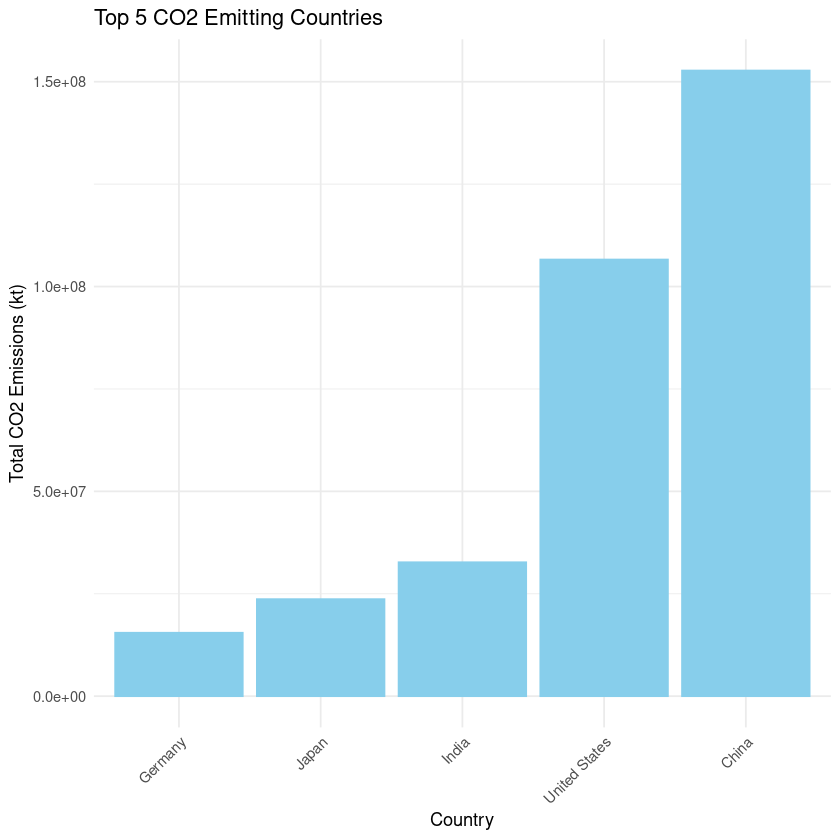

In [24]:
# Grouper les données par pays et calculer la somme totale des émissions de CO2 pour chaque pays
co2_emissions_by_country <- data %>%
  group_by(Entity) %>%
  summarise(Total_CO2 = sum(CO2, na.rm = TRUE)) %>%
  arrange(desc(Total_CO2))

# Sélectionner les 5 pays les plus émetteurs de CO2
top_5_co2_emitters <- head(co2_emissions_by_country, 5)

# Visualisation des 5 plus grands émetteurs de CO2
ggplot(top_5_co2_emitters, aes(x = reorder(Entity, Total_CO2), y = Total_CO2, fill = Entity)) +
  geom_bar(stat = "identity", color = "skyblue", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Top 5 CO2 Emitting Countries", x = "Country", y = "Total CO2 Emissions (kt)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Afficher les noms et les valeurs des 5 plus grands émetteurs de CO2
print(top_5_co2_emitters)


In [25]:
# Calculer la somme des émissions des 5 pays les plus émetteurs
sum_top_5_co2_emitters <- sum(top_5_co2_emitters$Total_CO2)

cat("Somme des émissions des 5 pays les plus émetteurs :", sum_top_5_co2_emitters, "\n\n")

# Calculer le pourcentage que représente la somme des émissions des 5 pays les plus émetteurs par rapport aux émissions totales
total_co2_emissions <- sum(co2_emissions_by_country$Total_CO2)
percentage_top_5_co2_emitters <- (sum_top_5_co2_emitters / total_co2_emissions) * 100

cat("Pourcentage des émissions des 5 pays les plus polluants :", percentage_top_5_co2_emitters, "%")


Somme des émissions des 5 pays les plus émetteurs : 331150780 

Pourcentage des émissions des 5 pays les plus polluants : 68.39547 %

La visualisation montre clairement l'hétérogénéité des émissions de CO2 entre les pays, avec les 5 pays les plus émetteurs de CO2 étant :

* Chine avec environ 152 732 800 kt de CO2 émis.
* États-Unis avec environ 106 590 800 kt de CO2 émis.
* Inde avec environ 32 679 580 kt de CO2 émis.
* Japon avec environ 23 674 690 kt de CO2 émis.
* Allemagne avec environ 15 472 890 kt de CO2 émis.

Ces résultats mettent en évidence la grande disparité des contributions aux émissions de CO2 à l'échelle mondiale, avec la Chine et les États-Unis se distinguant nettement comme les plus grands émetteurs. Au total, les émissions des 5 pays les plus polluants représentent 331 150 779 kt de CO2 émis, c'est à dire 68% des émissions totales.

On veut maintenant ramener ces chiffres par rapport à la surface et à la densité de population par pays


In [29]:
# Filtrer les données pour chaque pays

df_chn <- filter(data, Entity == 'China')
df_usa <- filter(data, Entity == 'United States')
df_ind <- filter(data, Entity == 'India')
df_jpn <- filter(data, Entity == 'Japan')
df_ger <- filter(data, Entity == 'Germany')

# Assumons que top_5_co2_emitters est une liste ou un vecteur avec les totaux des émissions pour ces pays
# Calcul des émissions de CO2 par personne

co2_chn <- top_5_co2_emitters[1]/(df_chn$Density[1]*df_chn$Area[1])
co2_usa <- top_5_co2_emitters[2]/(df_usa$Density[1]*df_usa$Area[1])
co2_ind <- top_5_co2_emitters[3]/(df_ind$Density[1]*df_ind$Area[1])
co2_jpn <- top_5_co2_emitters[4]/(df_jpn$Density[1]*df_jpn$Area[1])
co2_ger <- top_5_co2_emitters[5]/(df_ger$Density[1]*df_ger$Area[1])

cat("Emissions par habitant en Chine :", co2_chn, "\n")
cat("Emissions par habitant aux Etats-Unis :", co2_usa, "\n")
cat("Emissions par habitant en Inde :", co2_ind, "\n")
cat("Emissions par habitant au Japon :", co2_jpn, "\n")
cat("Emissions par habitant en Allemagne :", co2_ger, "\n")


Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”


ERROR: Error in FUN(left, right): argument non numérique pour un opérateur binaire


Interprétation :

On observe que, parmis les 5 pays les plus polluants, le classement est remanié une fois les émissions ramenées à la population. Les Etats-Unis sont le pays avec les émissions par habitant les plus importantes. A l'inverse, l'Inde présente une population très importante, ce qui en fait un pays très polluant. Cependant, ses habitants ont des émissions 15 fois moins importantes que les Américains.

## 2.4 - ANalyse descriptive multidimensionnelle des données

### 2.4.1 - Première visualisation globale